In [3]:
import os
import cv2
import matplotlib.pyplot as plt
from xml.etree.ElementTree import parse

414 675 815 1269 cat
824 224 1793 1290 dog


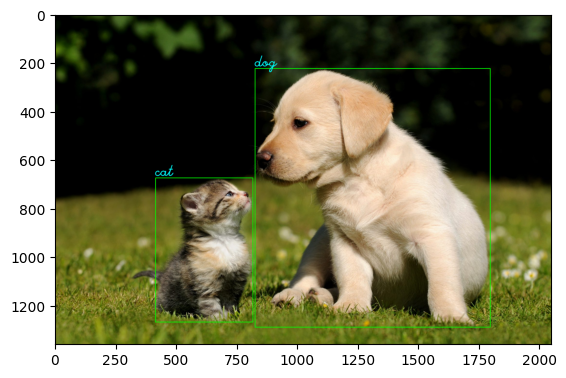

In [34]:
def xml_read(xml_path):
    root = parse(xml_path).getroot()
    
    image_info = root.findall('image')
    
    for image in image_info:
        bbox = image.findall('box')
        
        image_width = image.attrib['width']
        image_height = image.attrib['height']
        
        image_name = image.attrib['name']
        image_name = os.path.join("./", image_name)
        
        image = cv2.imread(image_name)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        for box_info in bbox:
            label = box_info.attrib['label']
            
            xtl = box_info.attrib['xtl']
            ytl = box_info.attrib['ytl']
            xbr = box_info.attrib['xbr']
            ybr = box_info.attrib['ybr']
            
            xtl_f = float(xtl)
            ytl_f = float(ytl)
            xbr_f = float(xbr)
            ybr_f = float(ybr)
            
            xtl_i = int(xtl_f)
            ytl_i = int(ytl_f)
            xbr_i = int(xbr_f)
            ybr_i = int(ybr_f)
            
            print(xtl_i, ytl_i, xbr_i, ybr_i, label)
            
            # 시각화
            image = cv2.rectangle(image, (xtl_i, ytl_i), (xbr_i, ybr_i), (0, 255, 0), 2)
            
            image = cv2.putText(image, label, (xtl_i, ytl_i - 10), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 2, (0, 255, 255), 2, cv2.LINE_AA)
            # ytl에서 10을 빼야 상자보다 조금 더 올라가짐 더해주면 상자 안으로 들어간다.
            
    plt.imshow(image)
    plt.show()
    
xml_read("./annotations.xml")